## Priciple component Analysis


Principal Component Analysis (PCA) is a `dimensionality reduction` and data `visualization` technique that transforms a dataset with many variables (features) into a smaller set of new variables called `principal components (PCs)` while retaining most of the original information.

#### Key Concepts of PCA
- Dimensionality Reduction

    - PCA reduces the number of variables in a dataset while preserving as much variance (information) as possible.

    - Useful when dealing with high-dimensional data (e.g., images, genomics, finance).

- Principal Components (PCs)

    - PCs are uncorrelated (orthogonal) linear combinations of the original variables.

    - The first principal component (PC1) captures the most variance in the data.

    - The second principal component (PC2) captures the next most variance, and so on.

- Eigenvalues and Eigenvectors

    - PCA relies on eigen-decomposition of the covariance matrix.

    - Eigenvectors define the direction of the PCs.

    - Eigenvalues indicate the amount of variance explained by each PC.

#### Steps in PCA
- Standardize the Data

    - Center the data (subtract the mean) and scale it (divide by standard deviation) to ensure all variables contribute equally.

- Compute the Covariance Matrix

    - Measures how variables vary together.

- Calculate Eigenvalues and Eigenvectors

    - Eigenvectors determine the directions of the new feature space.

    - Eigenvalues determine their magnitude (importance).

- Sort and Select Principal Components

    - Sort eigenvalues in descending order.

    - Keep the top *k* components that explain most of the variance (e.g., 95%).

- Project Data onto New Axes (Transform Data)

    - Multiply original data by the selected eigenvectors to get the new reduced dataset.

#### Mathematical Formulation
Given a dataset 
X
X (with mean-centered columns), PCA finds a projection matrix 
W such that:

Y=XW
where:

Y = Transformed data (scores)

W = Matrix of eigenvectors (loadings)

The goal is to maximize variance:

Var(Y)=W 
T
 ΣW
where 
Σ is the covariance matrix of 
X.

#### Applications of PCA
- Data Compression: Reduce storage/computation needs.

- Noise Reduction: Remove less important components.

- Visualization: Plot high-dimensional data in 2D/3D.

- Feature Extraction: Improve machine learning models by removing redundancy.

####  Advantages & Limitations
- ✅ Pros:

    - Removes multicollinearity (correlated features).

    - Improves algorithm efficiency.

    - Helps in visualizing complex data.

- ❌ Cons:

    - Results can be hard to interpret.

    - Sensitive to scaling (standardization is crucial).

    - Assumes linear relationships.

#### Conclusion
PCA is a powerful tool for simplifying datasets while retaining essential structure. It works by finding new axes (principal components) that maximize variance, allowing for efficient data analysis and visualization.

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

##### Get white and Red wine dataset

In [3]:

df_red=pd.read_csv("../dataset/winequality-red.csv",delimiter=';')
df_red.to_csv("../dataset/red_converted_file.csv", index=False)
df_white=pd.read_csv("../dataset/winequality-white.csv",delimiter=';')
df_white.to_csv("../dataset/white_converted_file.csv", index=False)


#####     Create one dataset combining these two datasets

In [4]:
df_red['red']=1
df_white['red']=0
df=pd.concat([df_red, df_white], axis=0,ignore_index=True)
df.to_csv("../dataset/combined_dataset.csv", index=False)

In [5]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,red
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


In [6]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,red
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378,0.246114
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255,0.430779
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000,0.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000,0.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000,0.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,1.000000


In [7]:
df.shape


(6497, 13)

#### Missing values checking

In [8]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
red                     0
dtype: int64

##### Quality column divide into three bins

- quality <= 5 : bin 0
- quality =6,7 : bin 1
- quality >=8  : bin 2

In [9]:
# take the copy of the dataset
df_copy=df.copy()

df_copy['quality']=pd.cut(df_copy['quality'],[0,5,7,10],labels=[0,1,2])
df_copy.loc[df_copy['quality']==1]

y_data=df_copy['quality']
x_data=df_copy.drop(['quality'],axis=1)

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=.2, random_state=8, stratify=y_data)

print(df['quality'].head())
print(df_copy['quality'].head())

0    5
1    5
2    5
3    6
4    5
Name: quality, dtype: int64
0    0
1    0
2    0
3    1
4    0
Name: quality, dtype: category
Categories (3, int64): [0 < 1 < 2]


In [9]:
y_data.value_counts()

quality
1    3915
0    2384
2     198
Name: count, dtype: int64

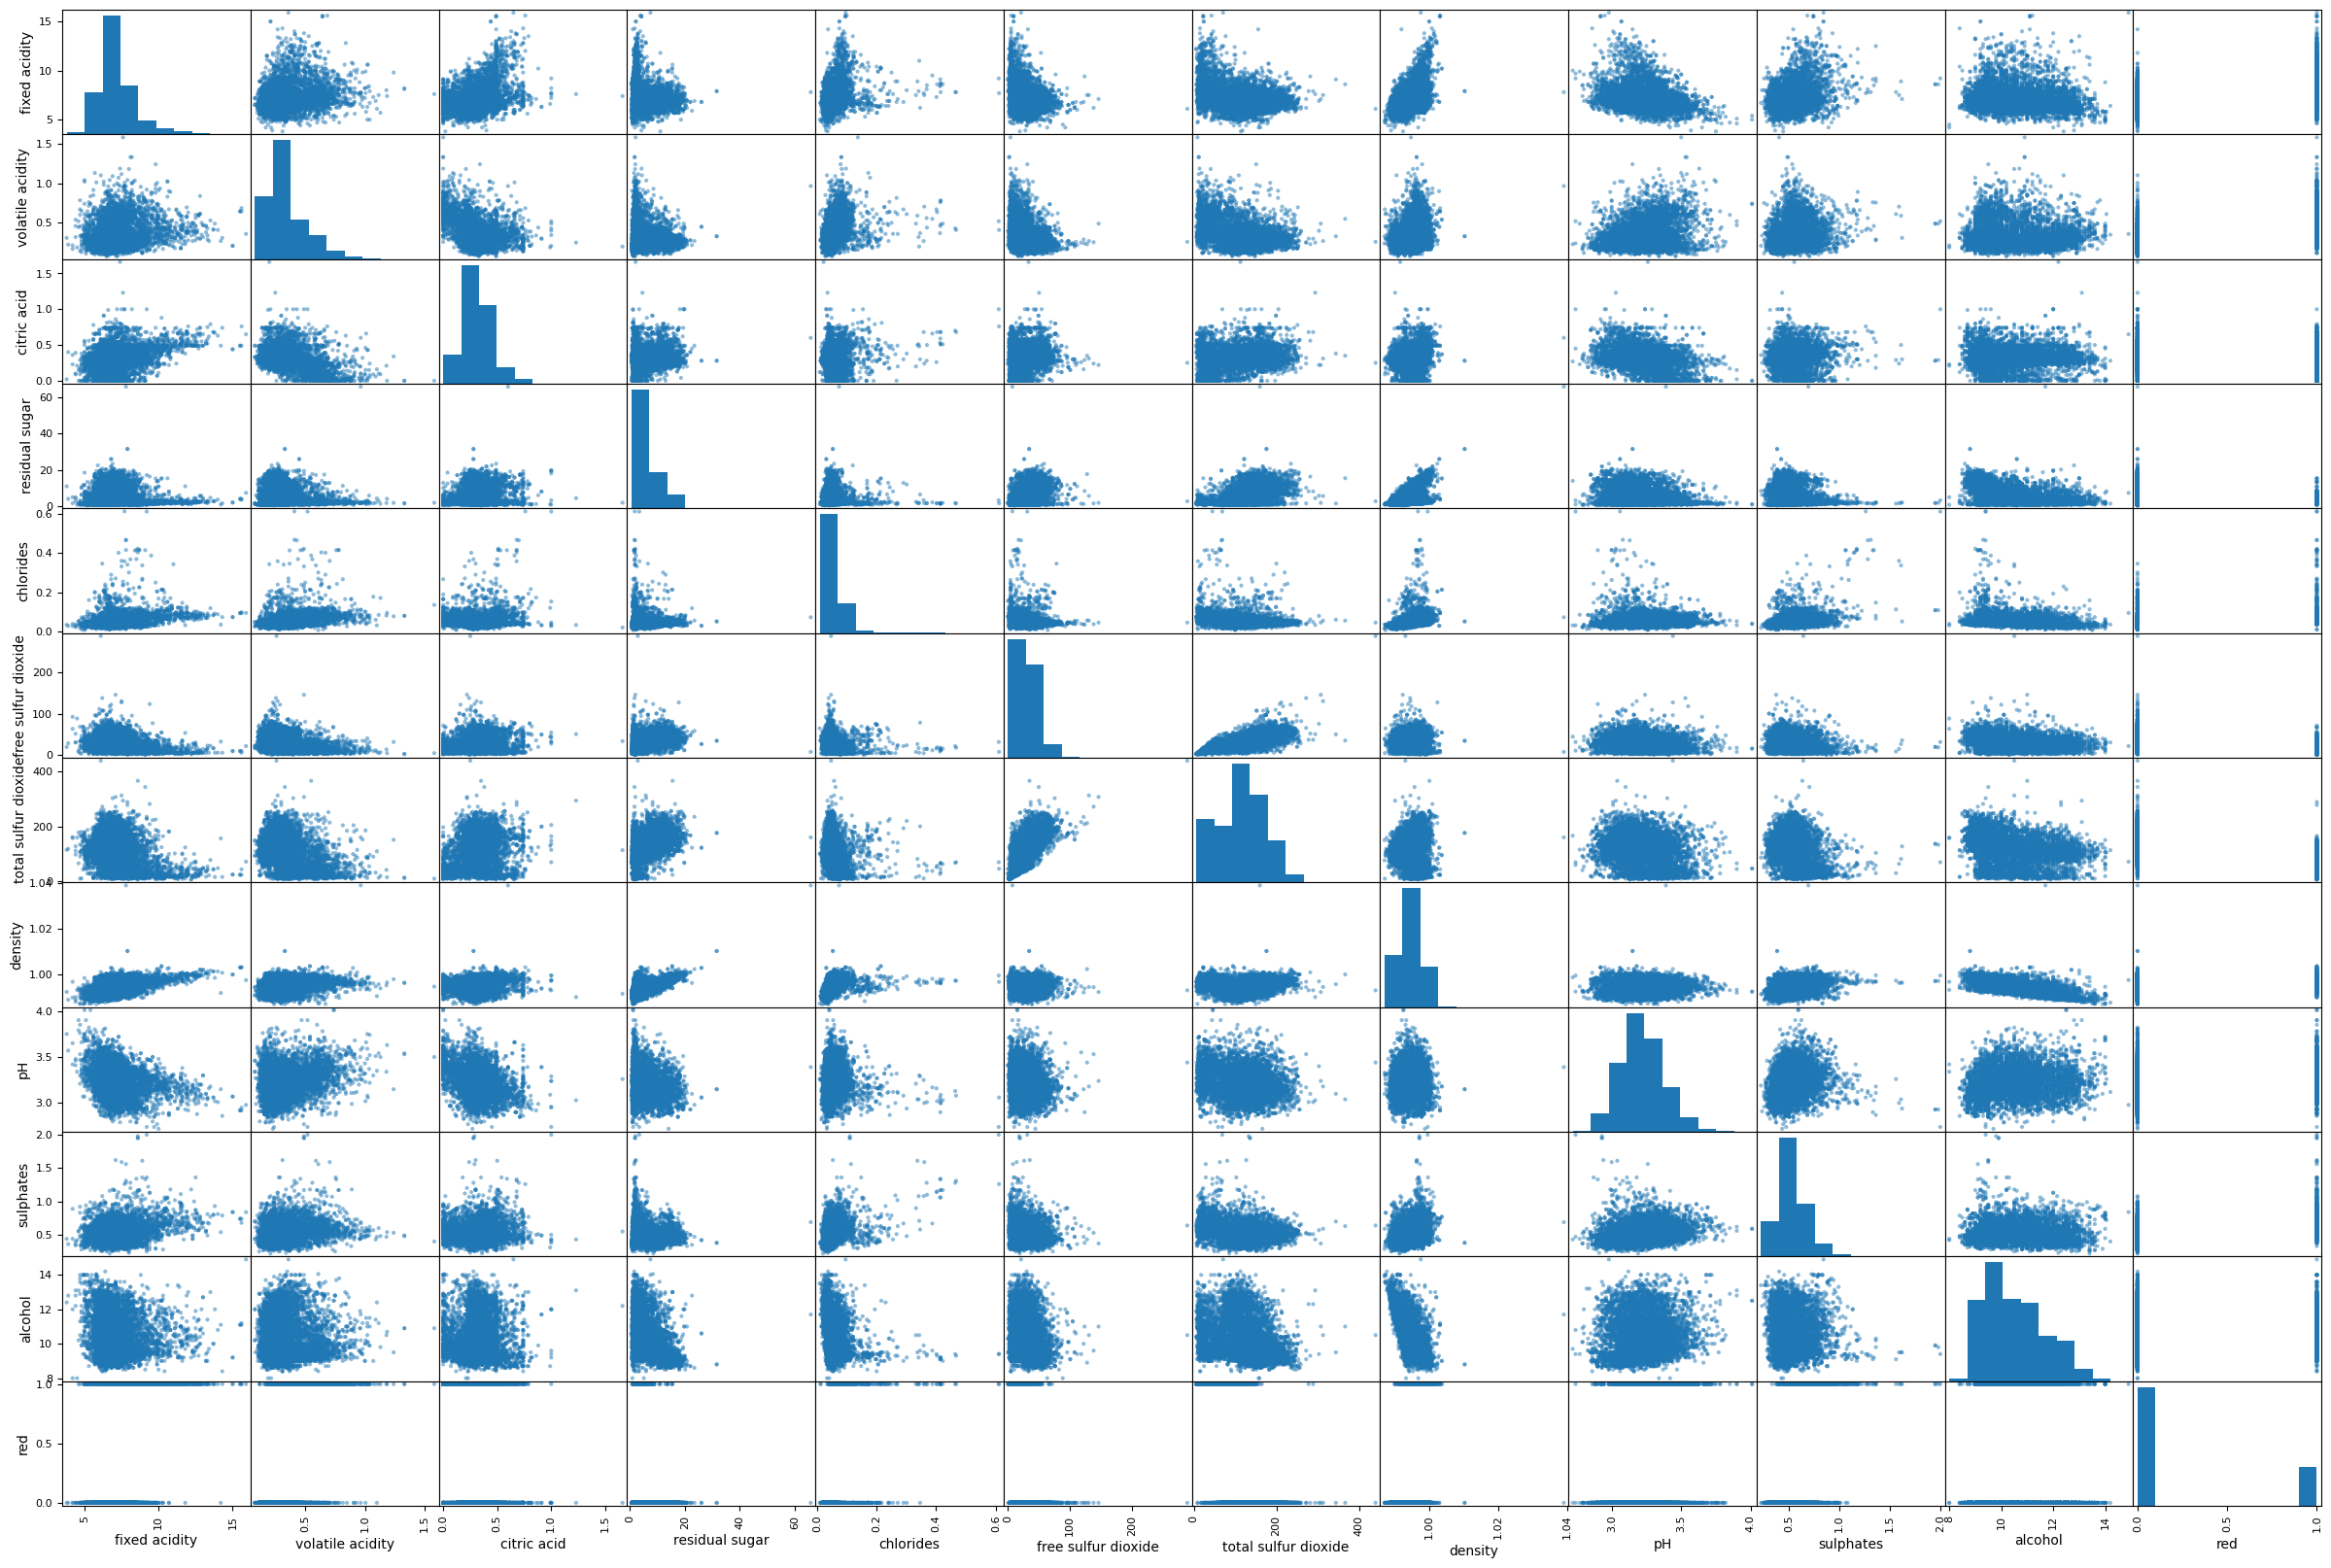

In [10]:
from pandas.plotting import scatter_matrix
scatter_matrix(df_copy, figsize=(30,20));

Text(0.5, 1.0, 'Covariance Matrix Heatmap')

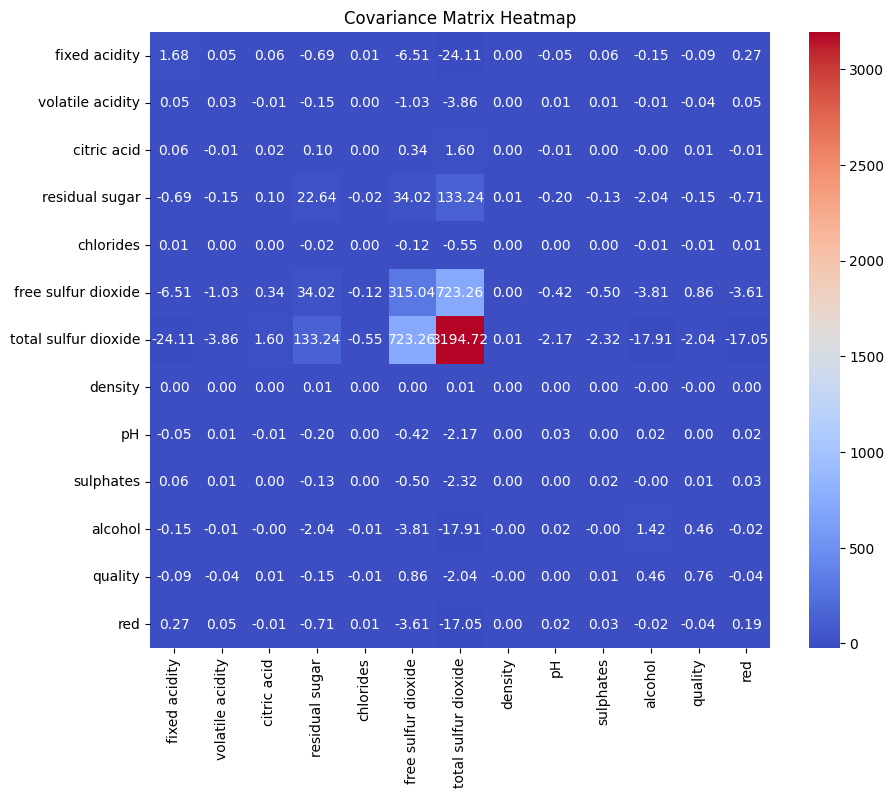

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


numeric_df = df.select_dtypes(include=['number'])

# 2. Compute covariance matrix
cov_matrix = numeric_df.cov()

# 3. Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cov_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Covariance Matrix Heatmap')


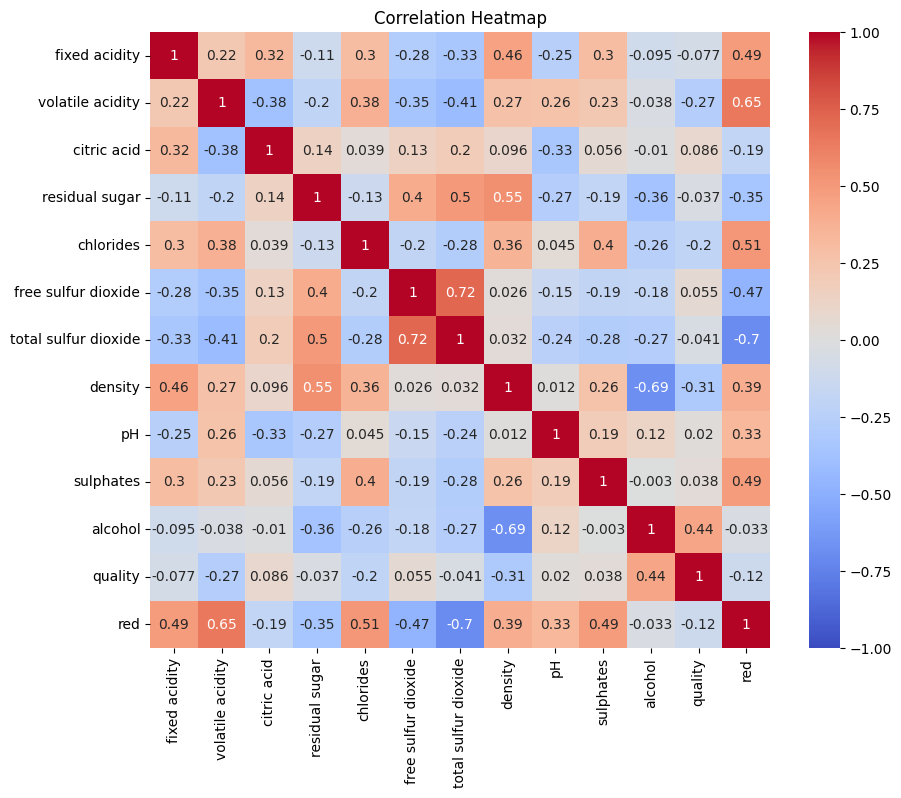

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
numeric_df = df.select_dtypes(include='number')  # only numeric columns
corr_matrix = numeric_df.corr()  # Pearson correlation by default

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

In [13]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'red'],
      dtype='object')

#### First Question

In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# X=df_copy
X=df.drop(['quality'], axis=1)
Y=df['quality']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Fit PCA for the first 10 components
pca = PCA(n_components=10)
X_pca = pca.fit_transform(X_scaled)

# Create a DataFrame of the principal components
pca_df = pd.DataFrame(
    data=X_pca,
    columns=[f"PC{i+1}" for i in range(10)]
)

In [15]:
pca_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,3.736061,-0.141167,-2.639176,-0.812551,-0.162601,-0.238104,-0.354928,-0.489758,0.042190,0.046336
1,3.682274,0.560824,-1.956191,-0.787450,1.300274,1.648933,0.211118,-0.469213,0.493986,-0.219544
2,3.663686,0.327782,-1.655090,-0.818451,0.770879,0.820245,0.239111,-0.412437,0.314528,-0.081784
3,2.479364,1.825784,2.619935,-0.280129,-0.661395,-0.544770,-1.146723,-0.814995,-0.541520,0.110617
4,3.736061,-0.141167,-2.639176,-0.812551,-0.162601,-0.238104,-0.354928,-0.489758,0.042190,0.046336
...,...,...,...,...,...,...,...,...,...,...
6492,-0.533033,-1.942360,0.211723,0.186893,0.040124,-0.664071,0.282027,-0.120657,-0.104941,-0.067532
6493,-1.789150,0.881656,-0.481605,0.191757,0.460496,0.301558,-0.456954,-0.187297,0.030085,-0.491822
6494,-0.901782,-0.627696,0.083204,-0.945473,1.288182,-0.538745,0.710964,-1.256756,-0.037220,-0.453647
6495,-0.915233,-3.474171,0.082928,-0.046866,-0.230693,-0.116401,-0.303042,0.686151,0.230053,0.102708


In [ ]:
# Print explained variance ratio
print("Explained Variance Ratio (First 10 PCs):")
print(pca.explained_variance_ratio_)

# Cumulative explained variance
print("\nCumulative Explained Variance:")
print(pca.explained_variance_ratio_.cumsum())



Explained Variance Ratio (First 10 PCs):
[0.3174498  0.21072897 0.13012495 0.08090319 0.06031777 0.05112838
 0.04469717 0.04191537 0.02937103 0.02140269 0.00994841 0.00201227]

Cumulative Explained Variance:
[0.3174498  0.52817876 0.65830372 0.73920691 0.79952468 0.85065306
 0.89535023 0.9372656  0.96663663 0.98803932 0.99798773 1.        ]


array([0.3174498 , 0.21072897, 0.13012495, 0.08090319, 0.06031777,
       0.05112838, 0.04469717, 0.04191537, 0.02937103, 0.02140269,
       0.00994841, 0.00201227])

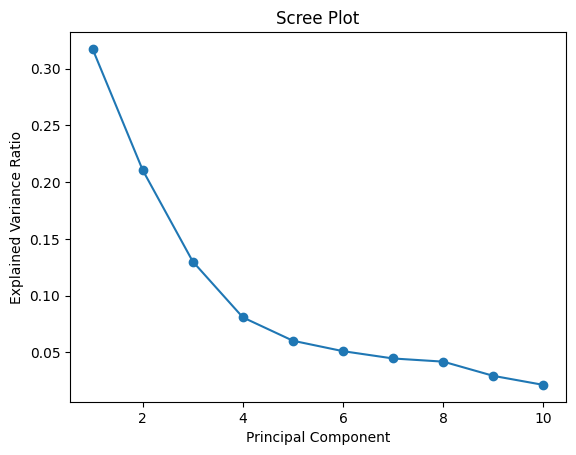

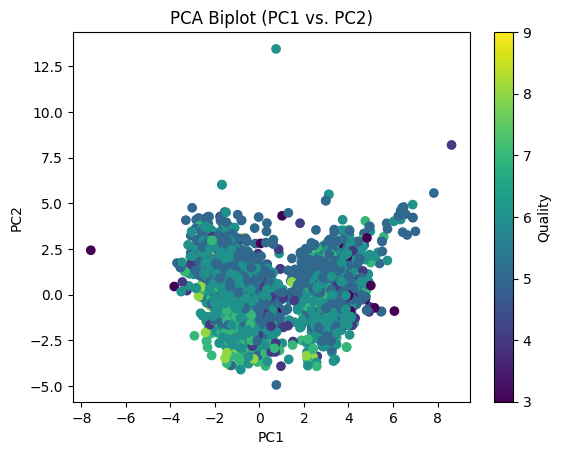

In [ ]:
import matplotlib.pyplot as plt

# Scree plot (variance per PC)
plt.plot(range(1, 11), pca.explained_variance_ratio_, 'o-')
plt.xlabel("Principal Component")
plt.ylabel("Explained Variance Ratio")
plt.title("Scree Plot")
plt.show()

# # PCA biplot (PC1 vs. PC2)
# plt.scatter(X_pca[:, 0], X_pca[:, 1], c=Y, cmap="viridis")
# plt.xlabel("PC1")
# plt.ylabel("PC2")
# plt.colorbar(label="Quality")
# plt.title("PCA Biplot (PC1 vs. PC2)")
# plt.show()

Cumulative Explained Variance for n=1 to 10:
PC1: 0.3174  (31.74%)
PC2: 0.5282  (52.82%)
PC3: 0.6583  (65.83%)
PC4: 0.7392  (73.92%)
PC5: 0.7995  (79.95%)
PC6: 0.8507  (85.07%)
PC7: 0.8954  (89.54%)
PC8: 0.9373  (93.73%)
PC9: 0.9666  (96.66%)
PC10: 0.9880  (98.80%)


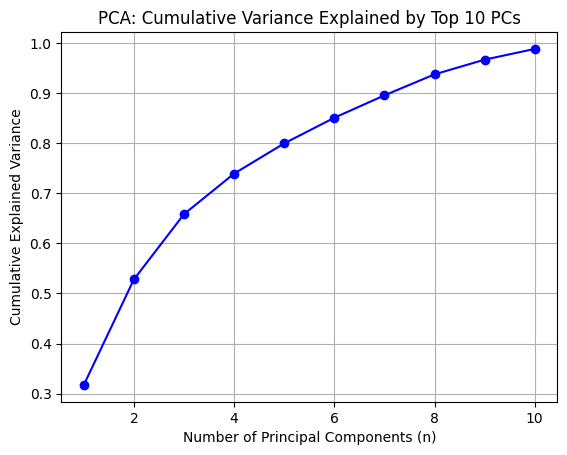

In [18]:
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Print results
print("Cumulative Explained Variance for n=1 to 10:")
for n in range(10):
    print(f"PC{n+1}: {cumulative_variance[n]:.4f}  ({cumulative_variance[n]*100:.2f}%)")

# Optional: Plot the cumulative variance
import matplotlib.pyplot as plt
plt.plot(range(1, 11), cumulative_variance, 'bo-')
plt.xlabel("Number of Principal Components (n)")
plt.ylabel("Cumulative Explained Variance")
plt.title("PCA: Cumulative Variance Explained by Top 10 PCs")
plt.grid(True)
plt.show()

In [19]:
# Fit PCA with 2 components
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X_scaled)

# Fit PCA with 10 components
pca_10d = PCA(n_components=10)
X_pca_10d = pca_10d.fit_transform(X_scaled)

# Compare PC1 and PC2
print("Explained Variance (PC1):")
print(f"2D PCA: {pca_2d.explained_variance_ratio_[0]:.4f}")
print(f"10D PCA: {pca_10d.explained_variance_ratio_[0]:.4f}")

print("\nExplained Variance (PC2):")
print(f"2D PCA: {pca_2d.explained_variance_ratio_[1]:.4f}")
print(f"10D PCA: {pca_10d.explained_variance_ratio_[1]:.4f}")

# Check if PC1 and PC2 are identical (up to sign)
print("\nAre PC1 and PC2 the same?")
print(np.allclose(X_pca_2d[:, 0], X_pca_10d[:, 0])) # Should return True
print(np.allclose(X_pca_2d[:, 1], X_pca_10d[:, 1]))  # Should return True

Explained Variance (PC1):
2D PCA: 0.3174
10D PCA: 0.3174

Explained Variance (PC2):
2D PCA: 0.2107
10D PCA: 0.2107

Are PC1 and PC2 the same?
True
True


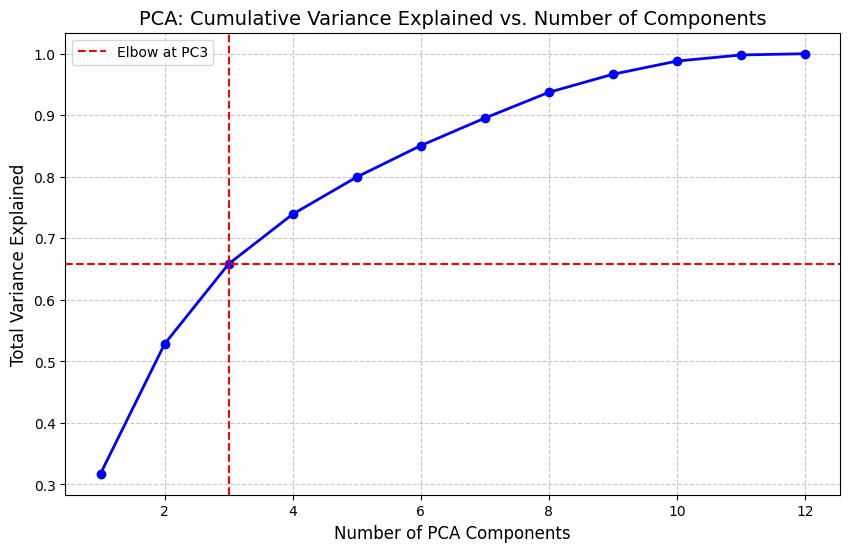

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Fit PCA with all components (to analyze full variance)
pca = PCA().fit(X_scaled)

# Calculate cumulative explained variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, 'bo-', linewidth=2)
plt.xlabel("Number of PCA Components", fontsize=12)
plt.ylabel("Total Variance Explained", fontsize=12)
plt.title("PCA: Cumulative Variance Explained vs. Number of Components", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)

# Highlight the "elbow point" (optional)
plt.axvline(x=3, color='r', linestyle='--', label='Elbow at PC3')
plt.axhline(y=cumulative_variance[2], color='r', linestyle='--')  # PC3's cumulative variance
plt.legend()

plt.show()